# Show spread of destination

In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
from helpers.highlevel_sceneloader import HighLevelSceneLoader
from predictors.dataset_creator import TFDataSet
from helpers.accuracy_functions import return_batch_accuracy, return_ds_accuracy
import tensorflow as tf
from predictors.dl_trainer import DLTrainer 
import matplotlib.pyplot as plt
import pickle
import numpy as np
from helpers.graph import Graph

In [2]:
ROOT = os.getcwd()

rel_p_img_b = 'helpers/analysed_vars_storage/img_bounds.xml'
rel_p_dests = 'helpers/analysed_vars_storage/destination_locations.xml'
p_img_bounds = os.path.join(ROOT, rel_p_img_b)
p_dest_locs = os.path.join(ROOT, rel_p_dests)

#TODO: older version of OpenTraj needed: "git checkout d249ba6951dd0f54b532fbe2ca6edc46b0d7093f"
opentraj_root = os.path.join(ROOT, 'OpenTraj')
root_datasets = os.path.join(ROOT, 'data/path_data')
sys.path.append(opentraj_root) # add package to pythonpath

scene_data = HighLevelSceneLoader(p_img_bounds, p_dest_locs)
scene_data.load_ind(root_datasets, 11)

In [3]:
endpoints = None
beginpoints = None
df = scene_data.traj_dataframe
for i in df["agent_id"].unique():
    extr = df.loc[df["agent_id"] == i]
    extr = extr[['pos_x', 'pos_y']].to_numpy()

    try:
        beginpoints = np.concatenate([beginpoints, extr[0:1,:]], axis=0)
        endpoints = np.concatenate([endpoints, extr[-1:,:]], axis=0)
    except:
        endpoints = extr[-1:, :]
        beginpoints = extr[0:1, :]

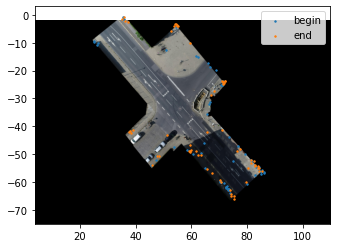

In [4]:
    fig1, ax1 = plt.subplots()
    d = {"x":0,"y":1}
    
    scene_data.plot_on_image([beginpoints, endpoints], 
    save_path='data/images/thesis_gens/inputs_outputs.png', ms = [2, 2], ax=ax1,
    col_num_dicts=[d,d], labels=["begin", "end"])

In [17]:
scene_data2 = HighLevelSceneLoader(p_img_bounds, p_dest_locs)
scene_data2.load_sdd(opentraj_root, "little", "video0")

ValueError: could not convert string to float: '.'

In [16]:
scene_data2.traj_dataframe.max()


index               99238
frame_id             9000
agent_id              124
pos_x             46.4419
pos_y             72.5888
label          pedestrian
lost                    1
occluded                1
generated               1
scene_id     gates-video2
timestamp             300
vel_x             2.57803
vel_y             2.99735
dtype: object